# Machine Learning

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
df = pd.read_csv('nba_preseason_team_stats.csv')
df

,RANK,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,YEAR
0,1,GSW,6,6,0,1.0,48.0,112.7,40.7,86.3,...,45.8,30.0,17.8,8.8,6.0,4.5,20.5,18.3,17.3,2024-25
1,2,BOS,5,4,1,0.8,48.0,121.8,42.8,95.0,...,45.6,29.6,12.2,9.8,5.6,1.2,20.2,21.6,16.6,2024-25
2,2,LAC,5,4,1,0.8,48.0,105.8,38.8,81.8,...,43.8,24.4,19.0,13.6,7.0,5.2,19.0,21.0,9.2,2024-25
3,2,MIA,5,4,1,0.8,48.0,112.6,41.0,90.2,...,42.8,29.8,16.0,15.2,4.4,5.4,22.4,21.6,3.2,2024-25
4,2,NYK,5,4,1,0.8,48.0,114.2,39.6,91.6,...,46.8,23.4,12.6,8.8,4.2,5.0,17.8,24.6,7.0,2024-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,15,MIL,1,0,1,0.0,48.0,94.0,32.0,75.0,...,43.0,20.0,24.0,9.0,4.0,7.0,26.0,0.0,-11.0,2003-04
731,15,NYK,1,0,1,0.0,48.0,86.0,30.0,79.0,...,37.0,19.0,19.0,11.0,5.0,7.0,28.0,0.0,-18.0,2003-04
732,15,ORL,2,0,2,0.0,48.0,93.5,34.0,74.5,...,35.5,16.0,17.5,10.5,5.0,4.5,25.0,0.0,-8.5,2003-04
733,15,PHI,1,0,1,0.0,53.0,79.0,26.0,79.0,...,44.0,7.0,20.0,7.0,3.0,6.0,30.0,0.0,-7.0,2003-04


In [257]:
# Find total null values in each column
df.isnull().sum()

RANK      0
TEAM    127
GP        0
W         0
L         0
WIN%      0
MIN       0
PTS       0
FGM       0
FGA       0
FG%       0
3PM       0
3PA       0
3P%       0
FTM       0
FTA       0
FT%       0
OREB      0
DREB      0
REB       0
AST       0
TOV       0
STL       0
BLK       0
BLKA      0
PF        0
PFD       0
+/-       0
YEAR      0
dtype: int64

In [258]:
# Drop null rows
df = df.dropna(axis=0)

# Display
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 734
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RANK    608 non-null    int64  
 1   TEAM    608 non-null    object 
 2   GP      608 non-null    int64  
 3   W       608 non-null    int64  
 4   L       608 non-null    int64  
 5   WIN%    608 non-null    float64
 6   MIN     608 non-null    float64
 7   PTS     608 non-null    float64
 8   FGM     608 non-null    float64
 9   FGA     608 non-null    float64
 10  FG%     608 non-null    float64
 11  3PM     608 non-null    float64
 12  3PA     608 non-null    float64
 13  3P%     608 non-null    float64
 14  FTM     608 non-null    float64
 15  FTA     608 non-null    float64
 16  FT%     608 non-null    float64
 17  OREB    608 non-null    float64
 18  DREB    608 non-null    float64
 19  REB     608 non-null    float64
 20  AST     608 non-null    float64
 21  TOV     608 non-null    float64
 22  STL    

In [259]:
df.columns

Index(['RANK', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-', 'YEAR'],
      dtype='object')

In [260]:
# Find columns that impact Points for each team
correlation = df.corr(numeric_only=True)
print(correlation['PTS'].sort_values(ascending=False))

PTS     1.000000
FGM     0.921673
3PM     0.763258
AST     0.758340
FGA     0.745578
3PA     0.712318
DREB    0.641587
REB     0.599910
FG%     0.518513
MIN     0.441495
+/-     0.435576
PFD     0.422624
WIN%    0.339109
3P%     0.315538
FT%     0.252149
W       0.232588
STL     0.185202
BLK     0.170592
BLKA    0.086132
FTM     0.043904
GP      0.008465
OREB   -0.004728
FTA    -0.041606
TOV    -0.102820
PF     -0.147633
L      -0.236407
RANK   -0.264074
Name: PTS, dtype: float64


In [261]:
df.columns

Index(['RANK', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-', 'YEAR'],
      dtype='object')

Text(0.5, 1.0, 'Correlation')

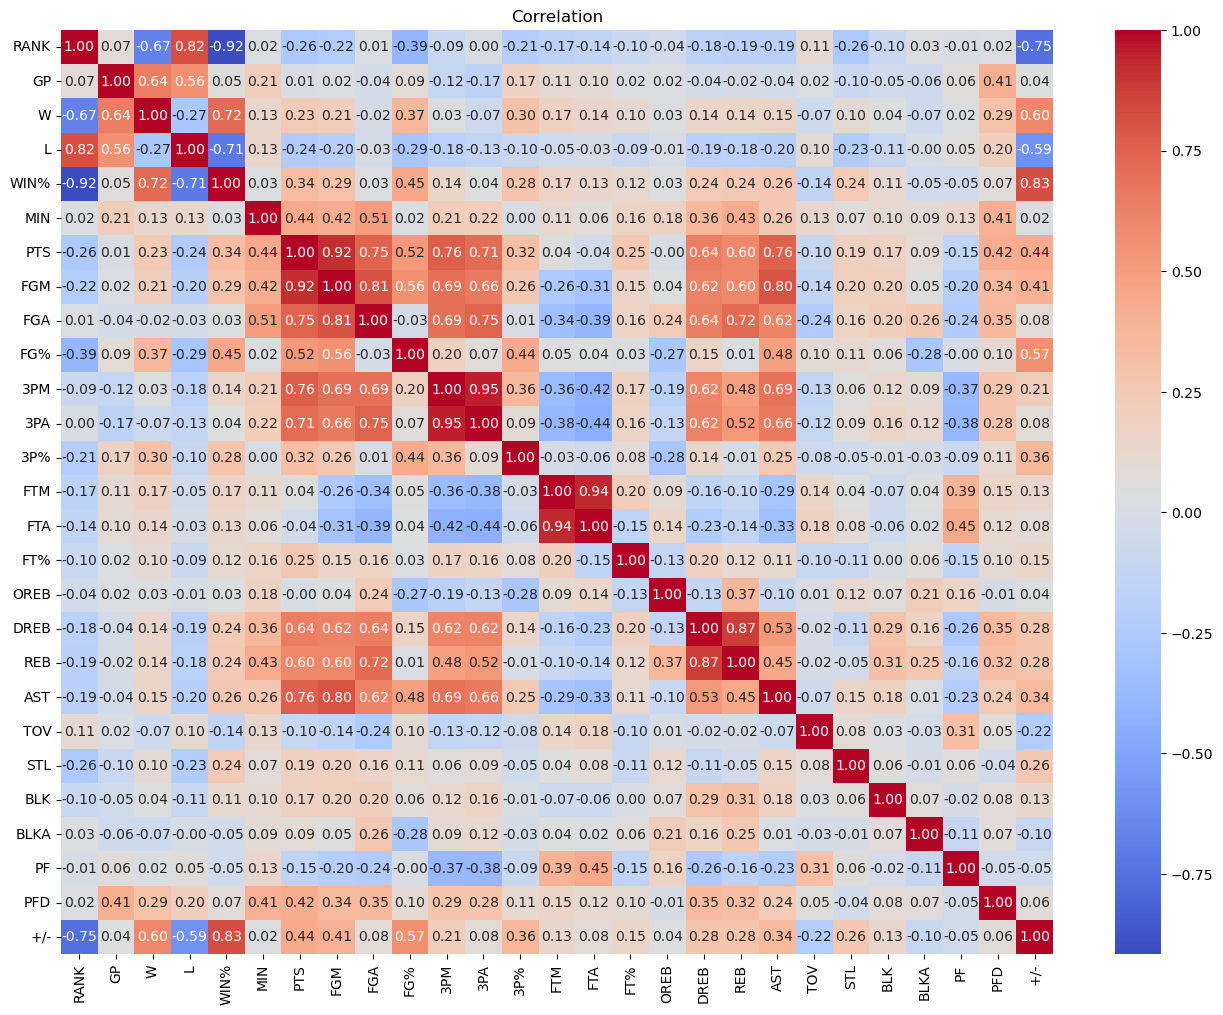

In [262]:
heatmap_columns = ['RANK', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-', 'YEAR']

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]


#Create heatmap
plt.figure(figsize=(16,12))
sns.heatmap(heatmap_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')

# Futre Scores Prediction Model

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [264]:
# Hand pick the features
X = df[['FGM','FGA', 'FG%', '3PM', '3PA','FTM' ,'DREB', 'AST', 'WIN%']]

# Create target variabble
y = df["PTS"]

# Train model
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=100)

# Train model and get score
model = LinearRegression()
model.fit(Xtrain, ytrain)
print(round(model.score(Xtest, ytest),3))


1.0


# CURRENT DAY STATS

In [265]:
from selenium import webdriver
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service

# Go to site to grab current day stats
# Set up the Selenium WebDriver (make sure to have the appropriate webdriver installed)

service = Service(executable_path="C:\Program Files (x86)\msedgedriver.exe")
driver = webdriver.Edge(service=service)

# URL of the webpage containing the dropdown menu
url = "https://www.nba.com/stats/teams/traditional?Season=2025-26&dir=A&sort=TEAM_NAME&PerMode=PerGame&SeasonType=Regular+Season"
driver.get(url)

# Introduce a wait to allow the page to load
time.sleep(2)

<>:12: SyntaxWarning: invalid escape sequence '\P'
<>:12: SyntaxWarning: invalid escape sequence '\P'
C:\Users\admin\AppData\Local\Temp\ipykernel_10624\4064468249.py:12: SyntaxWarning: invalid escape sequence '\P'
  service = Service(executable_path="C:\Program Files (x86)\msedgedriver.exe")


In [266]:
# Find the table on the page
table = WebDriverWait(driver, 5).until(
EC.presence_of_element_located((By.XPATH, '//*[@id="__next"]/div[2]/div[2]/div[3]/section[2]/div/div[2]/div[3]/table'))
)

# Store the table data in a variable for looping
tbody = table.find_element(By.TAG_NAME, 'tbody')
rows = WebDriverWait(driver, 5).until(
    EC.presence_of_all_elements_located((By.TAG_NAME, 'tr'))
)


# Store Current Data in a table
table_data = []
for row in rows:
        try:
            row_cells = row.find_elements(By.TAG_NAME, 'td')
            # Check if the row contains cells (data) before processing
            if row_cells[9:]:
                row_text = [cell.text for cell in row_cells]
                table_data.append(row_text) 
        except:
            # Handle StaleElementReferenceException by refinding the row
            rows = WebDriverWait(driver, 5).until(
                EC.presence_of_all_elements_located((By.TAG_NAME, 'tr'))
            )
        
# Get table headers
headers = table.find_element(By.XPATH,'//*[@id="__next"]/div[2]/div[2]/div[3]/section[2]/div/div[2]/div[3]/table/thead').text.split(' ')
headers.pop(0)

# Close the window
driver.close()

In [267]:
import pandas as pd

# Store updated game stats in a dataframe
updated_game_stats = pd.DataFrame(table_data, columns=headers)
updated_game_stats.head()

,,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,,Atlanta Hawks,4,1,3,.250,48.0,113.0,40.8,89.5,...,29.0,39.0,27.0,13.8,7.8,4.3,3.5,21.3,24.0,-9.5
1,,Boston Celtics,4,1,3,.250,48.0,111.5,40.5,90.5,...,31.3,42.8,19.3,12.8,8.3,6.5,3.3,25.8,20.8,3.8
2,,Brooklyn Nets,4,0,4,.000,48.0,114.3,40.8,89.3,...,24.8,36.8,24.8,15.8,7.3,0.8,5.0,27.5,22.0,-16.3
3,,Charlotte Hornets,4,2,2,.500,48.0,128.3,44.5,90.3,...,35.3,47.0,29.8,16.0,8.0,3.8,3.5,21.3,24.0,3.5
4,,Chicago Bulls,3,3,0,1.000,48.0,117.7,42.0,87.3,...,38.0,49.0,29.3,18.7,8.0,4.7,5.3,23.0,23.7,7.0


In [268]:
# Define abbreviation map
team_abbr = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BKN",
    "Charlotte Hornets": "CHA",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "LA Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Pelicans": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHX",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS"
}

# Map the abbreviations to the TEAM column
updated_game_stats["ABBRV"] = updated_game_stats["TEAM"].map(team_abbr)


In [269]:
# CREATE A DATAFRAME WITH THE IMPORTANT FEATURES FOR MODEL
features_only_df = updated_game_stats[['ABBRV','FGM','FGA', 'FG%', '3PM', '3PA', 'FTM','DREB', 'AST', 'WIN%']]
features_only_df


,ABBRV,FGM,FGA,FG%,3PM,3PA,FTM,DREB,AST,WIN%
0,ATL,40.8,89.5,45.5,11.3,33.8,20.3,29.0,27.0,.250
1,BOS,40.5,90.5,44.8,14.8,46.3,15.8,31.3,19.3,.250
2,BKN,40.8,89.3,45.7,16.0,43.8,16.8,24.8,24.8,.000
3,CHA,44.5,90.3,49.3,16.5,40.3,22.8,35.3,29.8,.500
4,CHI,42.0,87.3,48.1,12.3,33.3,21.3,38.0,29.3,1.000
5,CLE,40.5,85.0,47.6,15.0,40.8,23.0,31.3,25.3,.750
6,DAL,38.0,85.8,44.3,10.3,30.0,21.8,33.5,23.8,.250
7,DEN,46.7,89.0,52.4,12.7,32.3,24.3,34.7,29.0,.667
8,DET,39.3,91.8,42.8,10.8,32.8,20.8,33.5,24.3,.500
9,GSW,41.2,85.2,48.4,17.4,42.6,21.0,31.4,29.2,.800


# Find Games for Today

In [281]:
from datetime import datetime as dt

# Get today's date
today_date = dt.now().strftime("%d-%m-%Y")

# Display
today_date

'29-10-2025'

In [282]:
# Read in 2025 NBA schedule
schedule_df = pd.read_csv("./nba-2025-UTC.csv")

# Display
schedule_df

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result
0,1,1,21/10/2025 23:30,Paycom Center,Oklahoma City Thunder,Houston Rockets,125 - 124
1,2,1,22/10/2025 02:00,Crypto.com Arena,Los Angeles Lakers,Golden State Warriors,109 - 119
2,3,1,22/10/2025 23:00,Madison Square Garden,New York Knicks,Cleveland Cavaliers,119 - 111
3,5,1,22/10/2025 23:00,Spectrum Center,Charlotte Hornets,Brooklyn Nets,136 - 117
4,6,1,22/10/2025 23:00,Kia Center,Orlando Magic,Miami Heat,125 - 121
...,...,...,...,...,...,...,...
1195,1196,23,13/04/2026 00:30,Paycom Center,Oklahoma City Thunder,Phoenix Suns,NaN
1196,1197,23,13/04/2026 00:30,Frost Bank Center,San Antonio Spurs,Denver Nuggets,NaN
1197,1198,23,13/04/2026 00:30,Crypto.com Arena,Los Angeles Lakers,Utah Jazz,NaN
1198,1199,23,13/04/2026 00:30,Intuit Dome,LA Clippers,Golden State Warriors,NaN


In [284]:
schedule_df.columns

Index(['Match Number', 'Round Number', 'Date', 'Location', 'Home Team',
       'Away Team', 'Result'],
      dtype='object')

In [286]:
# Use the same abbreviation map as above for both home and away team
team_abbr = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BKN",
    "Charlotte Hornets": "CHA",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "LA Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Pelicans": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHX",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS"
}

# Map the abbreviations to the home team and away team column
schedule_df["HOME_ABBRV"] = schedule_df["Home Team"].map(team_abbr)
schedule_df["AWAY_ABBRV"] = schedule_df["Away Team"].map(team_abbr)


In [288]:
# Display
schedule_df.head()

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result,HOME_ABBRV,AWAY_ABBRV
0,1,1,21/10/2025 23:30,Paycom Center,Oklahoma City Thunder,Houston Rockets,125 - 124,OKC,HOU
1,2,1,22/10/2025 02:00,Crypto.com Arena,Los Angeles Lakers,Golden State Warriors,109 - 119,LAL,GSW
2,3,1,22/10/2025 23:00,Madison Square Garden,New York Knicks,Cleveland Cavaliers,119 - 111,NYK,CLE
3,5,1,22/10/2025 23:00,Spectrum Center,Charlotte Hornets,Brooklyn Nets,136 - 117,CHA,BKN
4,6,1,22/10/2025 23:00,Kia Center,Orlando Magic,Miami Heat,125 - 121,ORL,MIA


In [289]:
# Check data types
schedule_df.dtypes

Match Number     int64
Round Number     int64
Date            object
Location        object
Home Team       object
Away Team       object
Result          object
HOME_ABBRV      object
AWAY_ABBRV      object
dtype: object

In [290]:
# Convert 'Date' columne to datetime data type
schedule_df['Date'] = pd.to_datetime(schedule_df['Date'])

# Display   
schedule_df.dtypes

C:\Users\admin\AppData\Local\Temp\ipykernel_10624\453404986.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  schedule_df['Date'] = pd.to_datetime(schedule_df['Date'])


Match Number             int64
Round Number             int64
Date            datetime64[ns]
Location                object
Home Team               object
Away Team               object
Result                  object
HOME_ABBRV              object
AWAY_ABBRV              object
dtype: object

In [ ]:
# 

In [278]:
import pandas as pd

# Ask user for home/away team 
away_team = input("Enter away team abbreviation: ").upper()
home_team = input("Enter home team abbreviation: ").upper()

# Select both teams' feature rows
selected = features_only_df.loc[
    (features_only_df["ABBRV"] == home_team) | 
    (features_only_df["ABBRV"] == away_team)
].copy()

# Ensure correct feature order used in training
feature_names = ["FGM", "FGA", "FG%", "3PM", "3PA", "FTM", "DREB", "AST", "WIN%"]

# Predict points for both teams
selected["Predicted_PTS"] = model.predict(selected[feature_names])
selected["Predicted_PTS"] = selected["Predicted_PTS"].round(0)

# Sort by predicted points
selected = selected.sort_values("Predicted_PTS", ascending=False)

# Extract results
winner_abbr = selected.iloc[0]["ABBRV"]
loser_abbr = selected.iloc[1]["ABBRV"]
winner_pts = selected.iloc[0]["Predicted_PTS"]
loser_pts = selected.iloc[1]["Predicted_PTS"]
margin = round(abs(winner_pts - loser_pts), 1)
total_points = round(winner_pts + loser_pts, 1)

# Print results table
print(selected[["ABBRV", "Predicted_PTS"]])

# Final summary line
print(f"\n{home_team} vs {away_team}: {winner_abbr} wins by ~{margin} points | Total: {total_points}")

   ABBRV  Predicted_PTS
14   MEM          122.0
23   PHX          117.0

PHX vs MEM: MEM wins by ~5.0 points | Total: 239.0
